In [34]:
import os
import pandas as pd
import pandas_profiling
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

import kss
from konlpy.tag import Kkma  
from konlpy.tag import Twitter
from eunjeon import Mecab

# %appdata%\nltk_data\corpora\stopwords
# korean 파일을 생성하여 복사함
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

np.random.seed(42)

twitter = Twitter()
kkma = Kkma()
mecab = Mecab("C:\\mecab\\mecabrc")

# 한글출력
# matplotlib.rc('font', family='AppleGothic')  # MacOS
matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

### 자동차 관련 내용들
- http://www.ktword.co.kr/abbr_view.php?nav=2&id=1242&m_temp1=6270

### 꼬꼬마 
- http://kkma.snu.ac.kr/documents/index.jsp?doc=postag

### MeCab
- https://joyhong.tistory.com/128 
- mecab 위치 설정이 중요함

### Konlpy
- https://konlpy-ko.readthedocs.io/ko/v0.4.3/api/konlpy.tag/#konlpy.tag._mecab.Mecab


In [31]:
ROOT_DIR = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
dataset = pd.read_csv(os.path.join(ROOT_DIR, "dataset/one.csv"))

In [32]:
dataset_1 = dataset.loc[:, ['발행연도', '제목', '주제어', '국문 초록 (Abstract)', '다국어 초록 (Multilingual Abstract)']]
dataset_1 = dataset_1.rename({'발행연도':'year', '제목':'title', '주제어':'keyword', '국문 초록 (Abstract)':'abstract_old', '다국어 초록 (Multilingual Abstract)':'others'}, axis=1)

In [42]:
stop_words = []
stop_words.extend(stopwords.words('korean'))
stop_words.extend(stopwords.words('english'))

#색인 추출
def tokenizer_by_kkma(raw, pos=["NNG","NNP","NP", "VV"], stopword=stop_words):
    return [
        word for word, tag in kkma.pos(raw)
            if len(word) > 1 and tag in pos and word not in stopword
    ]

#색인 추출
def tokenizer_by_mecab(raw, pos=["NNG","NNP","NNB", "NNM", "NP", "SL", "SH"], stopword=stop_words):
    return [
        word for word, tag in mecab.pos(raw)
            if len(word) > 1 and tag in pos and word not in stopword
    ]

In [43]:
dataset_5 = dataset_1[dataset_1['year'] >= 2010]
rawdata = dataset_5["keyword"].dropna().tolist()

In [44]:
len(rawdata)

20425

In [45]:
result = []

for idx, val in enumerate(rawdata):
    if idx % 1000 == 0 :
        print(f'{idx + 1} 개를 처리중입니다. [{val}]')
    else :
        print(".", end='')
    words = tokenizer_by_mecab(val)
    result.extend(words)

.........................................................................................................................................................................................................................................................................................................................................................................................................................................................3001 개를 처리중입니다. [에스이오오씨,기능 안전,사용 사례,가정,가정된 안전 요구사항,기술안전요구사항,하드웨어 안전요구사항,사용의 가정,아키텍처,SEooC,ISO 26262 functional safety,Use case,Assumption,Assumed safety requirement,TSR,HSR,AoU,Architecture]
................................................................................................................................................................................................................................................................................................................................................................................

In [46]:
from collections import Counter

count = Counter(result)
words = dict(count.most_common(300))

In [47]:
print(words)

{'자동차': 3535, 'Vehicle': 2424, '시스템': 2153, '차량': 1788, '제어': 1410, 'System': 1376, 'vehicle': 1336, '해석': 1289, 'system': 1257, 'Electric': 1177, '장치': 1170, 'Fuel': 1118, 'analysis': 1086, 'Analysis': 1050, 'Control': 1040, '시험': 1020, '엔진': 984, '주행': 945, '모델': 930, 'Driving': 836, 'Design': 832, '전기': 794, '분석': 765, '연료': 722, 'control': 701, 'Autonomous': 699, 'Test': 677, 'test': 664, '센서': 658, '충돌': 658, '하이브리드': 655, '설계': 649, 'Automotive': 641, '평가': 633, '분사': 621, 'Model': 611, 'Motor': 610, 'Engine': 603, '성능': 595, '디젤': 584, 'model': 578, 'Car': 574, '안전': 567, 'Power': 560, '가스': 557, 'Automobile': 551, '구조': 535, 'Diesel': 534, '산업': 530, '요소': 529, 'engine': 516, '보험': 509, '모드': 502, '모터': 497, 'Air': 496, '자율주행': 495, '촉매': 492, 'High': 491, '조향': 487, 'Heat': 485, 'Hybrid': 481, '도로': 477, '특성': 475, 'Finite': 474, '배출': 470, 'Brake': 470, '최적화': 470, '유체': 468, '연비': 467, 'Simulation': 456, '토크': 444, 'Thermal': 443, 'Injection': 442, '역학': 435, 'Safety': 432, 

In [21]:
import matplotlib
import matplotlib.pyplot as plt

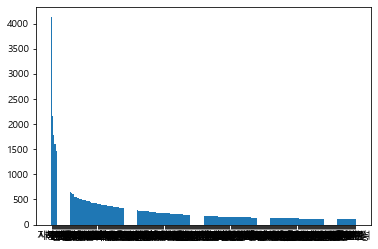

In [22]:
plt.bar(range(len(words)), list(words.values()), align='center')
plt.xticks(range(len(words)), list(words.keys()))
plt.show()

In [23]:
import tokenize as token

In [205]:
dataset_2 = dataset.loc[:, ['주제어']].dropna()
keywords_list = dataset_2['주제어'].str.replace("&lt,SUP&gt,", "").str.replace("&lt,/SUP&gt,", "").str.replace("&amp,", "&").str.replace("&amp;", "&").str.replace("&lt,SUB&gt,", "").str.replace("&lt,/SUB&gt,", "").str.replace("(", ",").str.replace(")", ",").str.replace("&amp,", "&").str.split(",").apply(lambda x: [e.strip() for e in x])

In [183]:
v1 = keywords_list.apply(pd.Series)

In [184]:
print(f'shape:{v1.shape}, length:{len(v1)}')

shape:(26933, 55), length:26933


In [185]:
v2 = v1.values.reshape(1, 1481315)[-1, :].tolist() #1, 26933 * 45

In [198]:
import re
p = re.compile("^[0-9]*[가-힣].*")

In [199]:
v2 = [x for x in v2 if x is not np.nan and x != "" and p.match(x)]
df = pd.DataFrame(v2, columns=['keyword'])

In [200]:
df.to_csv("./dataset/keyword.csv", index = False)

In [209]:
v3 = pd.read_csv("./dataset/keyword.csv")
v3.drop_duplicates()
v3.to_csv("./dataset/keyword_2.csv", index = False)

In [22]:
#C:\mecab\mecab-ko-dic

In [41]:
m.pos("자율주행 자동차는 새로운 기술입니다. Auto Car")

[('자율주행', 'NNP'),
 ('자동차', 'NNG'),
 ('는', 'JX'),
 ('새로운', 'VA+ETM'),
 ('기술', 'NNG'),
 ('입니다', 'VCP+EF'),
 ('.', 'SF'),
 ('Auto', 'SL'),
 ('Car', 'SL')]

In [9]:
m.pos("자율주행자동차")

[('자율', 'NNG'), ('주행', 'NNG'), ('자동차', 'NNG')]

In [13]:
'--rcfile %s' % os.path.abspath(os.path.join("/mecab", "mecab-ko-dic"))

'--rcfile c:\\mecab\\mecab-ko-dic'